# Titanic Disaster

Vamos a explorar el dataset de titanic
https://drive.google.com/file/d/19JX_iRnJx8V5OIcj20isPng9WSJhYwbn/view?usp=sharing


importa `matplotlib`, `numpy` y `pandas`

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fijate la ubicación del archivo

carga el dataset

In [45]:
df = pd.read_csv('data_ejs/kaggle_titanic.csv')

Explorá los métodos básicos (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.shape

(891, 12)

Fijate que hay missings en  `Cabin`. Elimina la columna

 [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [33]:
df.drop('Cabin', axis = 1, inplace = True)


## Analisis por clase


Usa `groupby()` y crea un dataframe por clase contando la cantidad de tickets vendidos por clase  (1, 2 or 3)

In [35]:
df_clases = df.groupby('Pclass').agg({'Ticket': 'count'})
df_clases

,Ticket
Pclass,
1,216
2,184
3,491


Hace un gráfico de barras

<AxesSubplot:xlabel='Pclass'>

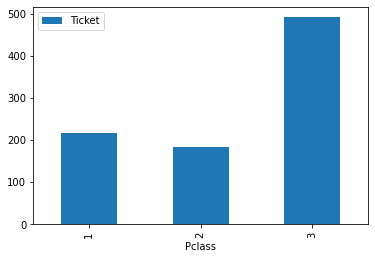

In [36]:
df_clases.plot(kind = 'bar')

analicemos **survivors**.

Armar un barchart con la frecuencia de survivals por clase

In [37]:
df_clases_sruvivors = df.groupby('Pclass')['Survived'].sum()
df_clases_sruvivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

### Analisis por genero

fijate la columna de Sex

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [49]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

Hace un barchart para ver quienes sobreviven más según genero

<AxesSubplot:xlabel='Sex'>

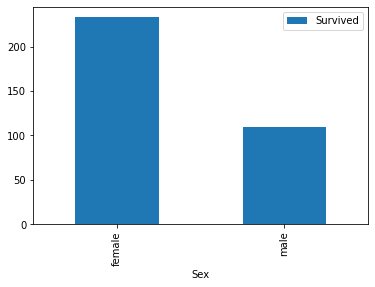

In [39]:
df_genero_survivors = df.groupby('Sex').agg({'Survived':'sum'})
df_genero_survivors.plot(kind = 'bar')

## Niños

crea un dataset para edad menor a 17 años

In [41]:
df_menores = df[df['Age'] < 17]
df_menores

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S


¿cuantos chicos había en el titanic?

In [43]:
len(df_menores)

100

¿Cuantos sorevivieron?

In [44]:
df_menores['Survived'].sum()

55